In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cosmic
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import independent

## Start playing with the metallicity, duration, and the models

In [3]:
final_kstar1 = [10,11,12]
final_kstar2 = [10,11,12]

InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=0.5, primary_model='kroupa01', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=1000)

print(InitialBinaries)

      kstar_1  kstar_2    mass_1    mass_2          porb       ecc  \
0         1.0      1.0  5.127518  4.235999     81.152034  0.821208   
1         1.0      1.0  1.630171  1.454066      5.833061  0.208704   
2         1.0      1.0  1.935526  1.772206      3.943594  0.309518   
3         1.0      1.0  1.007086  0.810447  25115.622051  0.064488   
4         1.0      1.0  8.663698  1.269254  21781.201544  0.038996   
...       ...      ...       ...       ...           ...       ...   
1029      1.0      1.0  1.000861  0.799051      9.169153  0.450026   
1030      1.0      1.0  0.747850  0.712120   1772.117197  0.084852   
1031      1.0      0.0  0.789381  0.683242    135.420240  0.320970   
1032      1.0      1.0  1.947149  1.843637   1034.673545  0.097934   
1033      1.0      1.0  1.018568  0.939188     23.316619  0.703866   

      metallicity   tphysf   mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0            0.02  13700.0  5.127518  4.235999  ...     0.0     0.0      0.0   

In [4]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

print(bcm.iloc[:10])

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1         lum_1     rad_1        teff_1  \
0      0.0      1.0  5.127518  5.127518  5.716544e+02  2.818781  16885.826095   
0  13700.0     15.0  0.871635  0.000000  2.737956e+02  0.226824  49520.097047   
1      0.0      1.0  1.630171  1.630171  6.165473e+00  1.535093   7373.843588   
1  13700.0     11.0  0.685566  0.685566  8.814345e-06  0.011674   2923.922223   
2      0.0      1.0  1.935526  1.935526  1.293799e+01  1.659328   8536.311348   
2  13700.0     11.0  0.758055  0.758055  5.910864e-06  0.010799   2750.960771   
3      0.0      1.0  1.007086  1.007086  6.506757e-01  0.890106   5519.375573   
3  13700.0     11.0  0.512206  0.512206  1.656042e-03  0.014037   9871.815235   
4      0.0      1.0  8.663698  8.663698  3.542109e+03  3.824348  22872.117475   
4  13700.0     13.0  8.505329  1.277584  1.262142e-10  0.000014   5193.769607   

    massc_1    radc_1        menv_1  ...          porb          sep       ecc  \
0  0.000000  0.000000  1.00

In [5]:
#print(bpp)
#print(bcm)
mass1 = bcm.mass_1
m1 = np.array(mass1)
mass2 = bcm.mass_2
m2 = np.array(mass2)

In [6]:
tphys = bcm.tphys
Tphys = np.array(tphys)

In [16]:
final_mass1 = [m1[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
#print(final_mass1)
final_mass2 = [m2[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
#print(final_mass2)
f_m1 = pd.DataFrame(final_mass1)
f_m2 = pd.DataFrame(final_mass2)

(array([139., 132., 492., 197.,  59.,   8.,   1.,   1.,   2.,   3.]),
 array([0.        , 0.26419805, 0.5283961 , 0.79259416, 1.05679221,
        1.32099026, 1.58518831, 1.84938636, 2.11358442, 2.37778247,
        2.64198052]),
 <BarContainer object of 10 artists>)

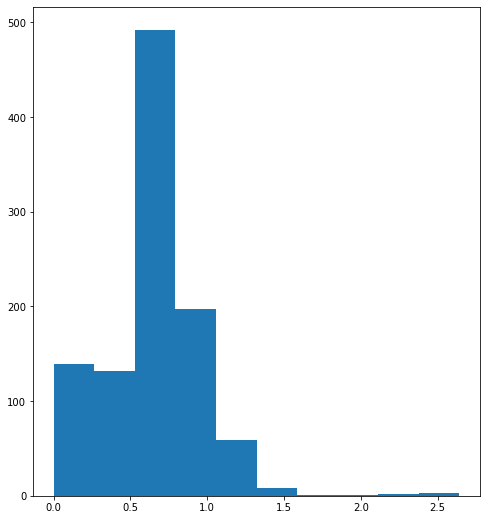

In [19]:
fig = plt.figure(figsize=(8,9))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(final_mass1)

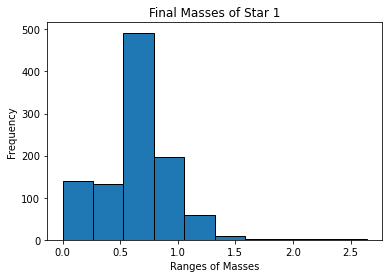

In [17]:
f_m1.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Final Masses of Star 1')
plt.xlabel('Ranges of Masses')
plt.show()

Text(0.5, 0, 'Range of Masses')

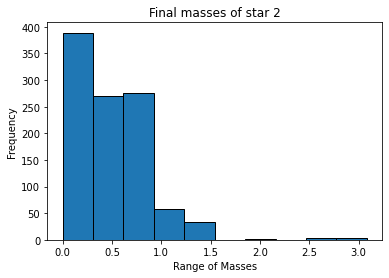

In [9]:
f_m2.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Final masses of star 2')
plt.xlabel('Range of Masses')

In [10]:
#Getting rid of any binary systems with a period of infinity
fperiod = bcm.porb
fp = np.array(fperiod)
f_period = [fp[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
f = [f_period[i] for i in range(len(f_period)) if f_period[i]!= np.Inf]
fp1 = pd.DataFrame(f)

Text(0.5, 0, 'Periods')

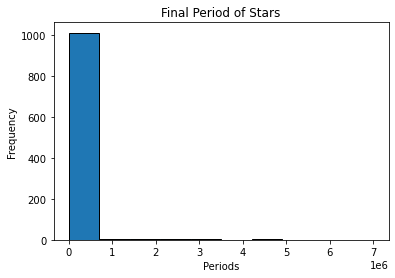

In [11]:
fp1.plot(kind='hist', edgecolor='black', legend=None)
plt.title('Final Period of Stars')
plt.xlabel('Periods')

# Change to 100,000 pop
# 